In [1]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
%matplotlib inline

## 天气数据

In [2]:
outlook=['Sunny','Overcast','Rain']
temperature=['Hot','Mild','Cool']
humidity=['High','Normal','Medium']
wind=['Strong','Weak','medium']
play=['yes','No']
outlook_list=list()
temperature_list=list()
humidity_list=list()
wind_list=list()
play_list=list()

for i in range(1,101):
    outlook_list.append(random.choice(outlook))
    temperature_list.append(random.choice(temperature))
    humidity_list.append(random.choice(humidity))
    wind_list.append(random.choice(wind))
    play_list.append(random.choice(play))

data=pd.DataFrame({'outlook':outlook_list,'temperature':temperature_list,'humidity':humidity_list,'wind':wind_list,'play':play_list})

In [3]:
data

,outlook,temperature,humidity,wind,play
0,Overcast,Cool,High,Weak,yes
1,Rain,Cool,Medium,medium,No
2,Rain,Mild,High,Weak,No
3,Overcast,Mild,Medium,Strong,yes
4,Rain,Cool,High,medium,yes
...,...,...,...,...,...
95,Sunny,Cool,Normal,Strong,yes
96,Sunny,Mild,Normal,Weak,yes
97,Sunny,Mild,Medium,Weak,No
98,Sunny,Cool,Normal,Strong,No


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [5]:
prep_list={'OHE':OneHotEncoder(),'LE':LabelEncoder()}

def prep(*args,data=data):
    data1=data.copy()
    param_list=[*args]
    for i in range(len(data.columns)):
        columns_name=data.columns[i]
        column_value=np.ravel(data[columns_name])
        if param_list[i]==1:
            data1[columns_name]=prep_list['OHE'].fit_transform(column_value.reshape(-1,1)).toarray()
        elif param_list[i]==2:
            data1[columns_name]=prep_list['LE'].fit_transform(column_value)
        elif param_list[i]==3:
            data1=pd.get_dummies(data1,columns=[columns_name])
        else:
            pass
    return data1

data1=prep(3,3,3,3,3,data=data)
sample=data1[data1.columns[:-1]]
target=data1[data1.columns[-1]]
#print(data1)   



In [6]:
data2=data.copy()
columns_name=data.columns[1]
print(columns_name)
column_value=np.ravel(data[columns_name])
data2=OneHotEncoder().fit_transform(column_value.reshape(-1,1)).toarray()

temperature


In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(sample,target,train_size=0.8)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(80, 13) (20, 13) (80,) (20,)


In [8]:
clf=DecisionTreeClassifier()
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score

print('ACC:',accuracy_score(Y_pred,Y_test))
print('REC:',recall_score(Y_pred,Y_test))
print('F1:',f1_score(Y_pred,Y_test))
print('CVS:',cross_val_score(clf,sample,target,cv=5))

ACC: 1.0
REC: 1.0
F1: 1.0
CVS: [1. 1. 1. 1. 1.]


In [10]:
columns_name=data.columns[1:3]
column_value=np.ravel(data[columns_name])
OneHotEncoder().fit_transform(column_value.reshape(-1,1)).toarray()


array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]])

## 红酒数据

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

In [12]:
wine=load_wine()

In [13]:
pd.merge(pd.DataFrame(wine.data),pd.DataFrame(wine.target),left_index=True,right_index=True)

,0_x,1,2,3,4,5,6,7,8,9,10,11,12,0_y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [14]:
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(wine.data,wine.target,train_size=0.8)
print(X_train.shape,X_test.shape)

(142, 13) (36, 13)


In [16]:
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,Y_train)
score=clf.score(X_test,Y_test)
print(score)

1.0


In [17]:
import graphviz
from sklearn.tree import export_graphviz

dot_data=export_graphviz(clf,feature_names=wine['feature_names'],class_names=['A','B','C'],filled=True,rounded=True)
graph=graphviz.Source(dot_data)
graphviz?

In [18]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [19]:
print(clf.feature_importances_) #特征重要性

[0.         0.         0.03047301 0.         0.         0.
 0.41404054 0.         0.         0.22976793 0.01465786 0.
 0.31106067]


In [20]:
[*zip(wine.feature_names,clf.feature_importances_)]

[('alcohol', 0.0),
 ('malic_acid', 0.0),
 ('ash', 0.030473008971287997),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.41404053504031957),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.2297679293071282),
 ('hue', 0.014657861394143268),
 ('od280/od315_of_diluted_wines', 0.0),
 ('proline', 0.31106066528712095)]

{'train_data': [0.6197183098591549, 0.9577464788732394, 0.9929577464788732, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'test_data': [0.6197183098591549, 0.9577464788732394, 0.9929577464788732, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}


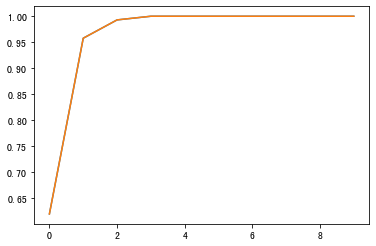

In [21]:
scores=dict()
train_data=[X_train,Y_train]
test_data=[X_test,Y_test]
datasets={'train_data':train_data,'test_data':train_data}
for i in range(10):
    for j in datasets:
        x=datasets[j][0]
        y=datasets[j][1]
        dataname=i
    
        clf=DecisionTreeClassifier(criterion='entropy',max_depth=i+1)
        clf.fit(x,y)
        score=clf.score(x,y)
        scores[j]=scores.get(j,[])+[score]

print(scores)
plt.plot(range(10),scores['train_data'])
plt.plot(range(10),scores['test_data'])
 

In [22]:
from sklearn.model_selection import RandomizedSearchCV
clf=DecisionTreeClassifier(criterion='entropy')
param_grid={'max_depth':[i for i in range(1,11)]}
clf=RandomizedSearchCV(clf,param_distributions=param_grid,cv=5)
print(clf.get_params)
clf.fit(X_train,Y_train)

clf.score(X_train,Y_train)

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                    

1.0

In [23]:
from sklearn.datasets import make_blobs,make_moons,make_circles,make_classification
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier

n=1000


datasets={
    'circles':make_circles(n_samples=n,noise=0.05,random_state=1),
    'blobs':make_blobs(n_samples=n,centers=3,random_state=1),
    'moons':make_moons(n_samples=n,noise=0.05,random_state=1),
    'classification':make_classification(n_samples=n,n_features=2,n_redundant=0,n_informative=2,n_clusters_per_class=1,random_state=1)
}

regrs={
    'None': None,
    'KMeans':KMeans(n_clusters=3),
    'DBSCAN':DBSCAN(min_samples=3),
    'AggClu':AgglomerativeClustering(n_clusters=3),
    'DTR':DecisionTreeClassifier() 
}


AttributeError: 'DecisionTreeClassifier' object has no attribute 'labels_'

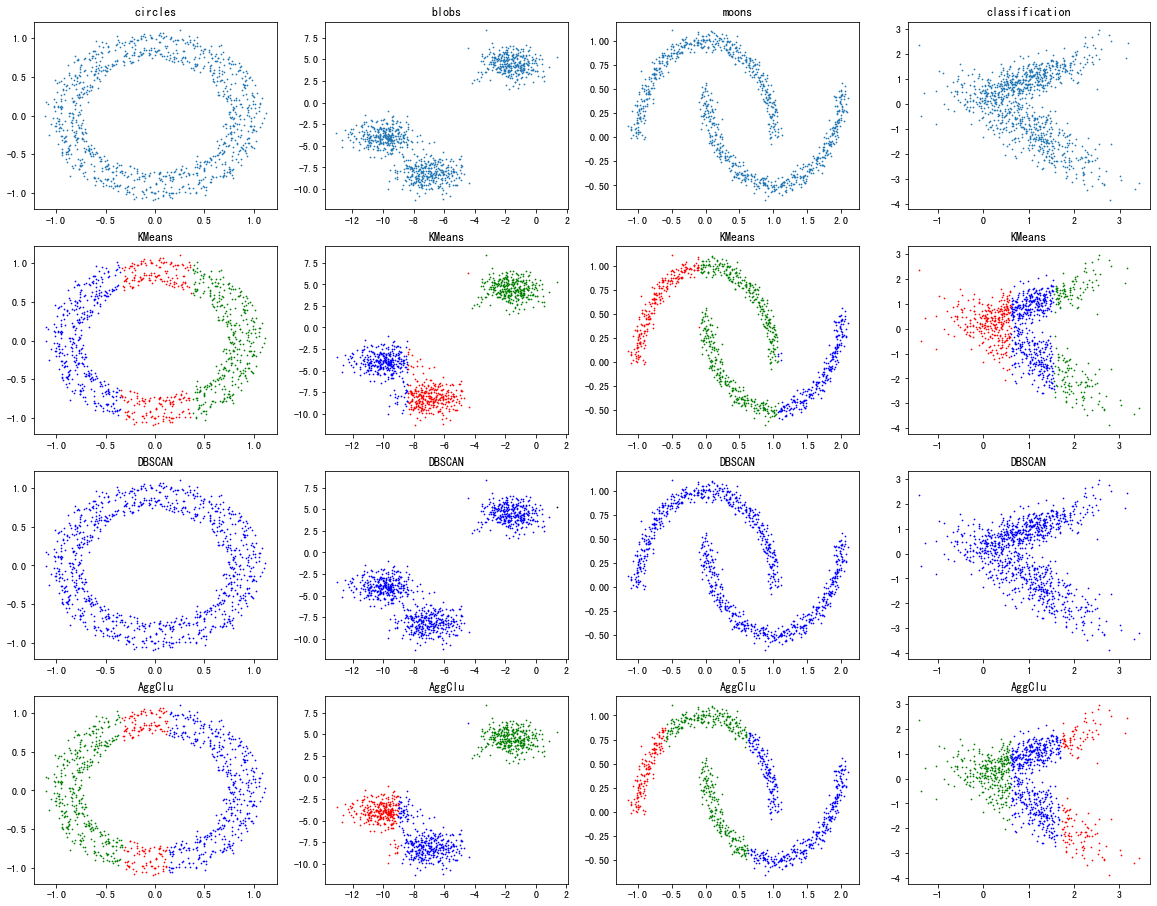

In [24]:
figure=plt.figure(figsize=(20,20))
columns=len(datasets)
rows=len(regrs)

colorbar='bgrcmykbgrcmyk'
index=1
for i,regr in enumerate(regrs):
    for j,dataset in enumerate(datasets):
        x=datasets[dataset][0][:,0].reshape(-1,1)
        y=datasets[dataset][0][:,1].reshape(-1,1)
        if not regrs[regr]:
            ax=figure.add_subplot(rows,columns,index)
            ax.scatter(x,y,s=0.5)
            ax.set_title(dataset)
            index+=1
        else:
            clf=regrs[regr]
            clf.fit(x,y.astype(int))
            color_index=clf.labels_.astype(int)
            ax=figure.add_subplot(rows,columns,index)
            for indice in range(len(x)):
                ax.scatter(x[indice],y[indice],c=colorbar[color_index[indice]],s=0.5)
            ax.set_title(regr)
            index+=1
                
            
  
        

        
        
        
        

In [ ]:
print(datasets.keys())

## 决策树回归

In [25]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt
%matplotlib inline

In [26]:
rng=np.random.RandomState(1)
X=np.sort(5*rng.rand(80))
Y=np.sin(X)
Y[::5]+=3*(0.5-rng.rand(16))
X=X.reshape(-1,1)
Y=Y.reshape(-1,1)

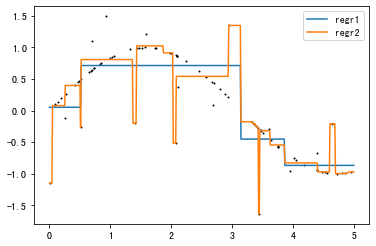

In [27]:
regr1=DecisionTreeRegressor(max_depth=2)
regr2=DecisionTreeRegressor(max_depth=5)
regr1.fit(X,Y)
regr2.fit(X,Y)
X_test=np.arange(0,5,0.01).reshape(-1,1)
Y_test1=regr1.predict(X_test)
Y_test2=regr2.predict(X_test)
plt.scatter(X,Y,s=1,c='black')
plt.plot(X_test,Y_test1,label='regr1')
plt.plot(X_test,Y_test2,label='regr2')
plt.legend()

## 泰坦尼克幸存者

In [168]:
data=pd.read_csv('/Users/hurrywish/Desktop/Jupyter/Taitanic data/data.csv')

print(data.shape)
data.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [169]:
data1=data.drop(columns=['Cabin','Name','Ticket'])
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [170]:
# data1['Age']=data1['Age'].fillna(data1['Age'].mean())
# data1.info()

from scipy.interpolate import lagrange

Age_null_index=data[data['Age'].isnull()].index


for i in Age_null_index:
    low_limit_index=i-4
    high_limit_index=i+4
    #print(low_limit_index,high_limit_index)
    y=data['Age'].iloc[low_limit_index:high_limit_index]
    y=y[y.notnull()]
    x=y.index
    value=lagrange(x,list(y))(i)
    if value>80 or value < 0:
        value=y.mean()
    value=round(value,2)
    print(value)
    data1['Age'].iloc[i]=value

    
data1.info()  
    
    


50.89
29.33
35.84
21.6
2.93
26.4
61.76
44.0
37.45
0.33
53.67
34.8
31.51
41.74
63.84
26.17
13.0
8.65
22.64
36.12
8.63
39.86
20.8
24.3
55.77
38.32
33.33
41.07
30.2
38.42
50.0
47.74
31.67
22.71
13.7
39.6
24.54
16.4
36.89
46.33
30.0
27.33
37.62
56.25
25.74
57.25
36.46
37.91
41.83
21.19
17.15
38.0
12.73
46.0
15.4
28.04
30.4
1.93
75.43
43.07
11.54
1.32
4.81
18.94
21.97
3.5
13.65
29.69
7.3
31.12
51.9
52.15
18.59
68.81
32.1
0.56
29.38
30.6
28.4
27.0
33.14
41.12
46.88
3.0
16.13
21.91
43.25
11.5
4.46
42.6
73.43
52.29
39.1
45.7
27.17
24.71
19.81
35.88
12.7

/Users/hurrywish/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)



11.88
41.17
41.06
40.88
45.5
27.38
16.5
22.49
44.57
49.32
22.2
36.36
20.0
6.0
42.38
22.56
38.29
20.88
29.1
25.4
36.0
51.5
47.75
40.14
39.4
40.74
54.13
15.6
44.0
6.43
31.14
48.29
46.38
12.76
11.0
18.96
27.46
13.4
20.11
33.89
18.23
48.47
33.21
18.0
29.29
41.43
7.98
46.19
27.43
52.0
23.5
34.1
15.21
49.34
30.0
30.92
33.06
56.05
35.4
37.05
24.29
17.8
2.17
14.09
29.64
19.0
26.0
64.83
13.28
1.88
28.67
61.75
32.0
35.43
38.31
28.71
28.0
20.76
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    obj

In [171]:
data1=data1.drop(data1[data1['Embarked'].isnull()].index,axis=0)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [172]:
data1['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [173]:
data1=pd.get_dummies(data1,columns=['Embarked'])
data1.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,7.2500,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,0,0,1


In [174]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
data1['Sex']=LE.fit_transform(data1['Sex'])
#data1['Embarked']=LE.fit_transform(data1['Embarked'])
data1.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.00,1,0,7.2500,0,0,1
1,2,1,1,0,38.00,1,0,71.2833,1,0,0
2,3,1,3,0,26.00,0,0,7.9250,0,0,1
3,4,1,1,0,35.00,1,0,53.1000,0,0,1
4,5,0,3,1,35.00,0,0,8.0500,0,0,1
5,6,0,3,1,50.89,0,0,8.4583,0,1,0
6,7,0,1,1,54.00,0,0,51.8625,0,0,1
7,8,0,3,1,2.00,3,1,21.0750,0,0,1
8,9,1,3,0,27.00,0,2,11.1333,0,0,1
9,10,1,2,0,14.00,1,0,30.0708,1,0,0


In [214]:
sample=data1[[i for i in data1.columns if i != 'Survived']]
label=data1['Survived']
#print(sample.shape,label.shape)
label

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [215]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(sample,label,train_size=0.8)
for i in [X_train,Y_train,X_test,Y_test]:
    i.index=range(len(i))
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(711, 10) (178, 10) (711,) (178,)


In [235]:
from sklearn.model_selection import cross_val_score
clf=DecisionTreeClassifier(random_state=1)

score_trains=list()
score_tests=list()
for i in range(1,11):
    clf=DecisionTreeClassifier(random_state=1,max_depth=i,criterion)
    clf.fit(X_train,Y_train)
    score_train=clf.score(X_train,Y_train)
    score_test=cross_val_score(clf,sample,label,cv=5).mean()
    score_trains.append(score_train)
    score_tests.append(score_test)
print(len(score_trains),len(score_tests))    
plt.plot(range(1,11),score_trains,label='score_trains')
plt.plot(range(1,11),score_tests,label='score_test')
plt.xticks(range(1,11))
plt.legend()


SyntaxError: invalid syntax (<ipython-input-235-a6f7444e04ac>, line 7)

In [220]:
from sklearn.model_selection import cross_val_score

score_cross=cross_val_score(clf,sample,label,cv=5)
print(score_cross.mean())

0.7480797308449185


0.8396776377020053
0.8374764509640386
10 10


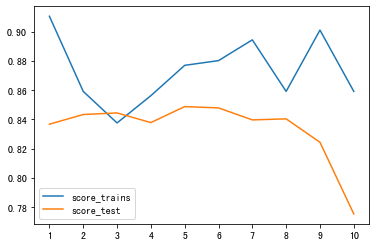

In [251]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

params={
    'criterion':['entropy','gini'],
    'max_depth':range(1,11),
    'min_samples_split':range(2,11),
    'min_samples_leaf':range(1,11),
    'splitter':['best','random']
}

clf1=RandomizedSearchCV(DecisionTreeClassifier(),param_distributions=params,scoring='roc_auc')
clf1.fit(X_train,Y_train)
print(clf1.score(X_train,Y_train))
print(cross_val_score(clf1,sample,label,cv=5).mean())
clf1.best_params_

score_trains=list()
score_tests=list()
for i in range(1,11):
    
    clf1.fit(X_train,Y_train)
    score_train=clf1.score(X_train,Y_train)
    score_test=cross_val_score(clf1,sample,label,cv=5).mean()
    score_trains.append(score_train)
    score_tests.append(score_test)
   
plt.plot(range(1,11),score_trains,label='score_trains')
plt.plot(range(1,11),score_tests,label='score_test')
plt.xticks(range(1,11))
plt.legend()